
# Testing the Features of GitHub Copilot

In [1]:
# Change working directory to ".."
setwd("..")

In [2]:
# Load libraries
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [58]:
# Load data
sim_data <- read.csv("input/sim_data.csv")

In [ ]:
grouped_data <- sim_data %>%
    group_by(hour_of_day) %>%
    summarise(mean_price = mean(mean_price),
              std_price = mean(std_price))

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


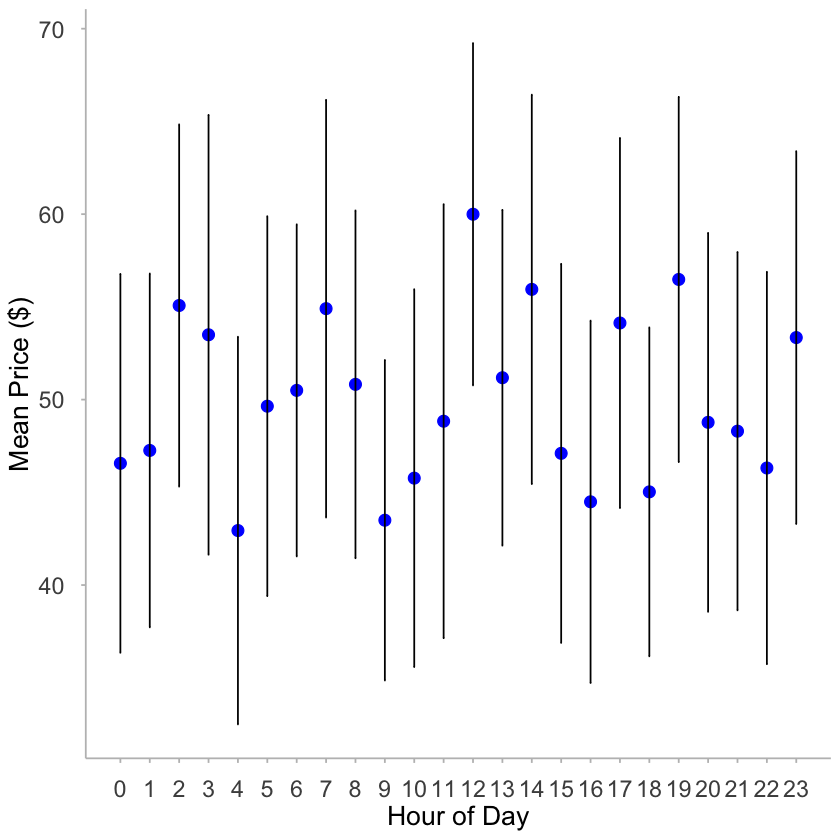

In [72]:
# Plot the grouped data with confidence intervals
ggplot(grouped_data, aes(x = hour_of_day, y = mean_price)) +
    geom_point(color = "blue", size = 3) +
    geom_errorbar(aes(ymin = mean_price - std_price, ymax = mean_price + std_price), width = 0.05) +
    labs(
        x = "Hour of Day",
        y = "Mean Price ($)") +
    theme(plot.title = element_text(size = 20, face = "bold"),
          axis.title = element_text(size = 16),
          axis.text = element_text(size = 14),
          axis.text.x = element_text(hjust = .5)) +  # Adjust the x-axis labels to the right
    ylim(0, 100) +
    scale_x_continuous(breaks = 0:23) +
    scale_y_continuous(breaks = seq(0, 100, 10))

# Save the plot as a PNG file
ggsave("output/mean_price_by_hour_of_day.png", width = 8, height = 6, dpi = 300, bg = "white")


In [ ]:
# Produce a cloropleth map of the mean price by zip code (it is assumed that the data contains a column called "zip_code")
# Note: This code assumes that the "uszipcode" package is installed and the "uszip" dataframe is available
# If the "uszip" dataframe is not available, it can be created by running the following code:
uszip <- uszipcode::us_zipcode() %>%
    select(zipcode, lat, lng)

# Merge the sim_data with the uszip dataframe
sim_data_with_coords <- left_join(sim_data, uszip, by = c("zip_code" = "zipcode"))

# Calculate the mean price by zip code
mean_price_by_zip <- sim_data_with_coords %>%
    group_by(zip_code) %>%
    summarise(mean_price = mean(mean_price))

# Plot the cloropleth map
ggplot(mean_price_by_zip, aes(x = lng, y = lat, fill = mean_price)) +
    borders("state") +
    geom_point(aes(x = lng, y = lat), color = "black", size = 1) +
    geom_polygon(data = uszip, aes(x = lng, y = lat, group = group), color = "black", fill = NA) +
    scale_fill_gradient(low = "white", high = "blue", na.value = "grey") +
    labs(
        x = "Longitude",
        y = "Latitude",
        fill = "Mean Price ($)") +
    theme(plot.title = element_text(size = 20, face = "bold"),
          axis.title = element_text(size = 16),
          axis.text = element_text(size = 14),
          axis.text.x = element_text(hjust = .5)) +  # Adjust the x-axis labels to the right
    coord_fixed(ratio = 1.5) +
    guides(fill = guide_colorbar(title.position = "top", title.hjust = 0.5)) +
    theme(legend.position = "bottom")


